# Carregamento e manipulação de dados com Pandas e Numpy

**Bibliotecas importadas**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

## Carregamento dos dados

Fonte de dados em formato **CSV**:

In [2]:
csv_df = pd.read_csv("data/itunes_data.csv")
csv_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


Fonte de dados **EXCEL**:

In [3]:
excel_df = pd.read_excel("data/itunes_data.xlsx", engine='openpyxl')
excel_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,My Time After Awhile,Robert Geddins/Ron Badger/Sheldon Feinberg,182491,6022698,0.99,Blues,The Best Of Buddy Guy - The Millenium Collection,Buddy Guy
1,Be Quick Or Be Dead,Bruce Dickinson/Janick Gers,204512,8181888,0.99,Rock,Fear Of The Dark,Iron Maiden
2,Água E Fogo,Chico Amaral/Edgard Scandurra/Samuel Rosa,278987,9272272,0.99,Rock,Maquinarama,Skank
3,Ozone Baby,"Jimmy Page, Robert Plant",215954,7079588,0.99,Rock,Coda,Led Zeppelin
4,Bop Boogie,NaN,189596,6093124,0.99,Jazz,Up An' Atom,Gene Krupa


Fonte de dados **SQL** usando o pacote `sqlalchemy`:

In [4]:
from sqlalchemy import create_engine

In [5]:
engine = create_engine('sqlite:///data/chinook.db')

In [6]:
query = """
    SELECT 
        tracks.name as Track,
        tracks.composer,
        tracks.milliseconds,
        tracks.bytes,
        tracks.unitprice,
        genres.name as Genre,
        albums.title as Album,
        artists.name as Artist
    FROM tracks
    JOIN genres ON tracks.genreid = genres.genreid
    JOIN albums ON tracks.albumid = albums.albumid
    JOIN artists ON albums.artistid = artists.artistid
"""
with engine.connect() as connection:
    sql_df = pd.read_sql(query, connection)
    
sql_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,Rock,For Those About To Rock We Salute You,AC/DC
1,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99,Rock,For Those About To Rock We Salute You,AC/DC
2,Let's Get It Up,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99,Rock,For Those About To Rock We Salute You,AC/DC
3,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,Rock,For Those About To Rock We Salute You,AC/DC
4,Snowballed,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99,Rock,For Those About To Rock We Salute You,AC/DC


Os três _dataframes_ carregados acima são combinados em um único conjunto de dados por meio do método `concat` da biblioteca **Pandas**:

In [7]:
itunes_df = pd.concat([csv_df, excel_df, sql_df])
itunes_df.reset_index(inplace=True, drop=True)

## Análise Exploratória de Dados

Nesta seção, serão realizadas algumas operações básicas de Análise Exploratória de dados (_Exploratory Data Analysis - EDA_), tais como:

* Examinar as dimensões do conjunto de dados
* Examinar as extremidades superior e inferior dos dados
* Examinar os tipos de dados e dados faltantes
* Investigar propriedades estatísticas dos dados
* Criar algumas visualizações gráficas dos dados

### Propriedades gerais dos dados

Os três primeiros items da lista acima correspondem a propriedade gerais/estruturais dos dados. Quanto ao primeiro item da lista acima, utiliza-se a propriedade `shape` de uma _dataframe_ pandas verificar o número de observações (linhas) e o número de variáveis (colunas) do conjunto de dados. A propriedade `shape` returna um objeto python de tipo **tupla**, cujos elementos corespondem ao número de linhas e ao número de colunas, respectivamente do _dataframe_.

In [8]:
itunes_df.shape

(4021, 8)

O passo seguinte é a inspeção visual dos dados, o que pode ser feito por meio dos métodos `head` e `tail`, repectivamente para os cinco primeiros e cinco últimos reristros:

In [9]:
itunes_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


In [10]:
itunes_df.tail()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
4016,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,286741,4718950,0.99,Classical,Respighi:Pines of Rome,Eugene Ormandy
4017,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,139200,2283131,0.99,Classical,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
4018,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,66639,1189062,0.99,Classical,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
4019,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,Mozart: Chamber Music,Nash Ensemble
4020,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble


O método `info` permite verificar dados faltantes bem como os tipos de dados das variáveis do _dataframe_ **itunes_df**

In [11]:
itunes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4021 entries, 0 to 4020
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Track         4021 non-null   object 
 1   Composer      2908 non-null   object 
 2   Milliseconds  4021 non-null   int64  
 3   Bytes         4021 non-null   int64  
 4   UnitPrice     4021 non-null   float64
 5   Genre         4021 non-null   object 
 6   Album         4021 non-null   object 
 7   Artist        4021 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 251.4+ KB


A contagem dos registros com valores faltantes para cada uma das variáveis é feita abaixo:

In [12]:
itunes_df.isna().sum()

Track              0
Composer        1113
Milliseconds       0
Bytes              0
UnitPrice          0
Genre              0
Album              0
Artist             0
dtype: int64

### Propriedades estatísticas dos dados

O mais básico resumo estatístico do conjunto de dados é obtido por meio do método `describe`, o qual retorna contagem e medidas estatíticas de posição e de dispersão dos dados de tipo numérico:

In [13]:
itunes_df.describe()

,Milliseconds,Bytes,UnitPrice
count,4.021000e+03,4.021000e+03,4021.000000
mean,3.927276e+05,3.311048e+07,1.050184
std,5.337745e+05,1.042268e+08,0.237857
min,1.071000e+03,3.874700e+04,0.990000
25%,2.069680e+05,6.372433e+06,0.990000
50%,2.554770e+05,8.102839e+06,0.990000
75%,3.217240e+05,1.025143e+07,0.990000
max,5.286953e+06,1.059546e+09,1.990000


Ainda a respeto dos dados de tipo numérico, o método `corr` fornece uma tabela de correlação de Pearson entre essas variáveis:

In [14]:
itunes_df.corr()

,Milliseconds,Bytes,UnitPrice
Milliseconds,1.000000,0.957791,0.934829
Bytes,0.957791,1.000000,0.938734
UnitPrice,0.934829,0.938734,1.000000


Observa-se que o preço unitário da faixa musical é fortemente correlcionado com a duração da música.

Para os dados não numéricos, é possível obter o valor mais frequente por meio do método `mode`. Por exemplo, o gênero musical mais frequente é:

In [15]:
itunes_df['Genre'].mode()

0    Rock
Name: Genre, dtype: object

O comando seguinte resulta numa tabela de frequências dos gêneros musicais:

In [16]:
itunes_df['Genre'].value_counts()

Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
TV Shows               105
Blues                   92
Classical               85
Drama                   71
R&B/Soul                69
Reggae                  64
Pop                     51
Soundtrack              50
Alternative             45
Hip Hop/Rap             40
Electronica/Dance       35
World                   32
Heavy Metal             31
Sci Fi & Fantasy        31
Easy Listening          28
Comedy                  20
Bossa Nova              17
Science Fiction         15
Rock And Roll           12
Opera                    1
Name: Genre, dtype: int64

O próximo comando fornece a quantidade de artistas presentes no _dataset_:

In [17]:
itunes_df['Artist'].unique().shape[0]

204

### Viaualizações gráficas dos dados

A primeira visualização gráfica realizada nesta seção é um histograma da distribuição dos dados de duração das faixas musicais:

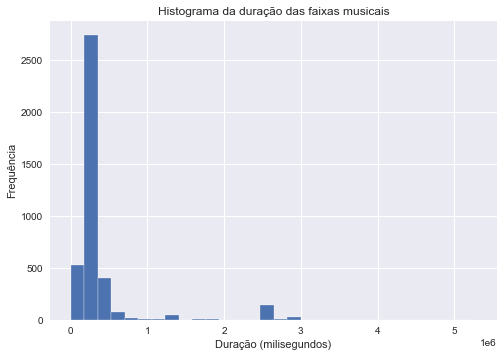

In [18]:
ax = itunes_df['Milliseconds'].hist(bins=30, edgecolor='white')
ax.set_title('Histograma da duração das faixas musicais')
ax.set_xlabel('Duração (milisegundos)')
ax.set_ylabel('Frequência')
plt.show()

In [19]:
itunes_df['Milliseconds'].describe()

count    4.021000e+03
mean     3.927276e+05
std      5.337745e+05
min      1.071000e+03
25%      2.069680e+05
50%      2.554770e+05
75%      3.217240e+05
max      5.286953e+06
Name: Milliseconds, dtype: float64

Quanto aos gêneros musicais, o próximo gráfico reforça o _rock_ como gênero mais ouviso.

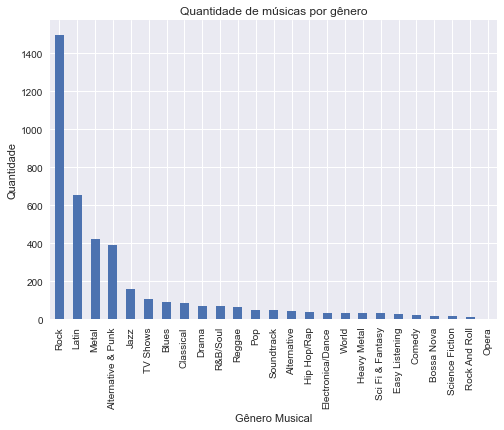

In [20]:
ax = itunes_df['Genre'].value_counts().plot.bar()
ax.set_title('Quantidade de músicas por gênero')
ax.set_xlabel('Gênero Musical')
ax.set_ylabel('Quantidade')
plt.show()

Por sua vez, os compositores mais relevantes em número de músicas foram:

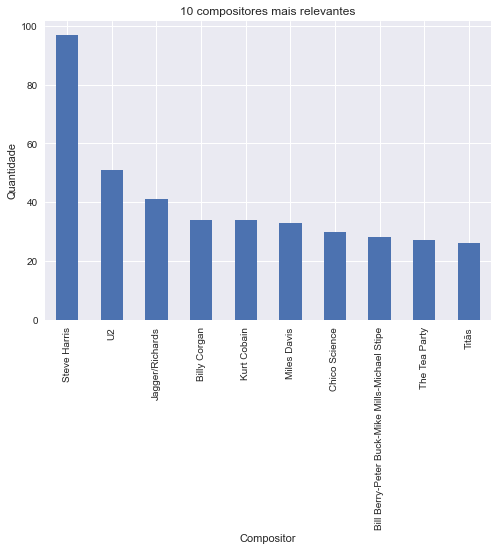

In [21]:
ax = itunes_df['Composer'].value_counts()[:10].plot.bar()
ax.set_title('10 compositores mais relevantes')
ax.set_xlabel('Compositor')
ax.set_ylabel('Quantidade')
plt.show()

## Limpeza de Dados

Esta etapa compreende as seguintes etapas:

* Remoção de dados irrelevantes
* Tratamento de valores duplicados
* Tratamento de dados faltantes (substituição ou exclusão de itens)
* Tratamento de valores extremos (_outliers_)
* Checagem de que os tipos de dados estejam corretos
* Padronização de formatos de dados (por exemplo, capitalização incompatível, unidades de conversão)

### Filtragem de dados do _dataframe_

Quando da criação do histograma da distribuição de duração das músicas na seção anterior, foi observado que a grande maioria das músicas tinha até 1.000.000 milisegundos. Entretanto, algumas músicas tinham duração muito maior. De fato o resumo estatístico abaixo mostra a música de maior duração tem aproximadamente $5,29 \cdot 10^6$ milisegundos enquanto que 75% das musicas tem menos de $3,21 \cdot 10^5$ milisegundos.

In [22]:
itunes_df['Milliseconds'].describe()

count    4.021000e+03
mean     3.927276e+05
std      5.337745e+05
min      1.071000e+03
25%      2.069680e+05
50%      2.554770e+05
75%      3.217240e+05
max      5.286953e+06
Name: Milliseconds, dtype: float64

Nesse sentido, cabe perguntar quais são as músicas mais longas. Considerando o ponto de corte "arbitrário" de $4,0 \cdot 10^5$ milisegundos, temos:

In [23]:
itunes_df[itunes_df['Milliseconds'] > 4e6]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
3351,Occupation / Precipice,None,5286953,1054423946,1.99,TV Shows,"Battlestar Galactica, Season 3",Battlestar Galactica
3416,Through a Looking Glass,None,5088838,1059546140,1.99,Drama,"Lost, Season 3",Lost


Considerando como ponto de corte a duração de $2 \cdot 10^6$ milisegundos, tem-se as seguintes frequências por gênero:

In [24]:
itunes_df[itunes_df['Milliseconds'] > 2e6]['Genre'].value_counts()

Drama               69
TV Shows            67
Sci Fi & Fantasy    31
Science Fiction     15
Comedy               2
Name: Genre, dtype: int64

### Remoção de dados irrelevantes

Se desejamos analisar apenas dados relcionados a músicas, podemos remover do conjunto de dados aqueles referentes a programas de TV, _e-books_ ou shows de comédia.

In [25]:
only_music = itunes_df[~itunes_df['Genre'].isin(['Drama', 'TV Shows', 'Sci Fi & Fantasy', 'Science Fiction', 'Comedy'])]

In [26]:
only_music.shape

(3779, 8)

Ficamos com apenas 3779 dados.

### Tratamento de valores duplicados

Preliminarmente, efeutamos a contagem de dados duplicados no conjunto de dados trabalhado:

In [27]:
only_music.duplicated().sum()

489

Essa quantidade de dados duplicados pode ser removida por uso do método `drop_duplicates`:

In [28]:
only_music.drop_duplicates(inplace=True)

C:\Users\igoan\AppData\Local\Temp\ipykernel_4900\303695726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_music.drop_duplicates(inplace=True)


In [29]:
only_music.shape

(3290, 8)

### Tratamento de dados faltantes

Os dados faltantes podem ser tratados por um ou mais das seguintes opções:

* Deixá-los como estão
* Excluí-los do conjunto de dados
* Preenchimento com um valor específico
* Substituição por algum valor representativo dos dados (média, moda ou mediana)
* Uso de aprendizado de máquina (_machine learning_) para substituição de valores

Como visto anteriormente, a única coluna que apresentava dados nulos era a coluna **Composer**.

In [30]:
only_music[only_music['Composer'].isna()].sample(5, random_state=42).head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
1477,A Small Victory,None,297168,9733572,0.99,Alternative & Punk,Angel Dust,Faith No More
1163,Samba Da Bênção,None,409965,13490008,0.99,Bossa Nova,Vinícius De Moraes - Sem Limite,Toquinho & Vinícius
3974,You Know I'm No Good,None,256946,4133694,0.99,R&B/Soul,Back to Black,Amy Winehouse
846,Cada Um Cada Um (A Namoradeira),None,253492,8441034,0.99,Latin,Na Pista,Cláudio Zoli
1377,Eu Te Devoro,None,311614,10312775,0.99,Latin,Djavan Ao Vivo - Vol. 02,Djavan


Neste caso, podemos substituir os valores faltantes por 'Unknown' como mostrado a seguir:

In [31]:
only_music.loc[only_music['Composer'].isna(), 'Composer'] = 'Unknown'

### Tratamento de valores extremos (_outliers_)

Um método bastante comum para detecção de _outliers_ para dados numéricos tem como base o Intervalo Interquartil ($IQR$), definido como a diferença entre o primeiro e o terceiro quaris. Por esse método, um valor extremo é definido como aquele dado cujo valor é $1,5 \cdot IQR$ superior ao terceiro quartil ($Q_3$) ou $1,5 \cdot IQR$ inferior ao primeiro quartil ($Q_1$). Por esse método, os dados não extremos estão entre os seguintes valores:

$$upper\_boundary = Q_3 + 1,5 \cdot IQR$$
e
$$lower\_boundary = Q_1 - 1,5 \cdot IQR$$

O _script_ abaixo mostra uma função para remoção de _outliers_ de uma daterminada coluna de um _dataframe_.

In [32]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    new_df = df.loc[(df[column] > lower_boundary) & \
                    (df[column] < upper_boundary)]
    return new_df

In [33]:
only_music_clean = remove_outliers(only_music, 'Milliseconds')

In [34]:
only_music_clean.shape

(3096, 8)

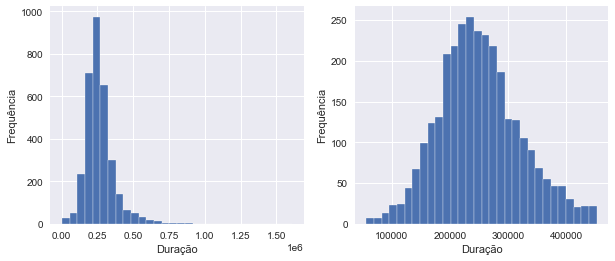

In [35]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))
only_music['Milliseconds'].hist(bins=30, edgecolor='white', ax=ax[0])
ax[0].set_xlabel('Duração')
ax[0].set_ylabel('Frequência')
only_music_clean['Milliseconds'].hist(bins=30, edgecolor='white', ax=ax[1])
ax[1].set_xlabel('Duração')
ax[1].set_ylabel('Frequência')
plt.show()

### Checagem de que os tipos de dados estejam corretos

In [36]:
only_music_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3096 entries, 1 to 4020
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Track         3096 non-null   object 
 1   Composer      3096 non-null   object 
 2   Milliseconds  3096 non-null   int64  
 3   Bytes         3096 non-null   int64  
 4   UnitPrice     3096 non-null   float64
 5   Genre         3096 non-null   object 
 6   Album         3096 non-null   object 
 7   Artist        3096 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 217.7+ KB


In [37]:
itunes_df['Milliseconds'] = itunes_df['Milliseconds'].astype('int')

## Transformação dos Dados

### Criação de novas colunas

In [46]:
only_music_clean['Seconds'] = only_music_clean['Milliseconds'] / 1000

C:\Users\igoan\AppData\Local\Temp\ipykernel_4900\1481472810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_music_clean['Seconds'] = only_music_clean['Milliseconds'] / 1000


In [48]:
only_music_clean['LenByteRatio'] = only_music_clean['Milliseconds'] / only_music_clean['Bytes']

C:\Users\igoan\AppData\Local\Temp\ipykernel_4900\2495519754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_music_clean['LenByteRatio'] = only_music_clean['Milliseconds'] / only_music_clean['Bytes']


In [49]:
only_music_clean.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist,Seconds,LenByteRatio
1,Beira Mar,Gilberto Gil,295444.0,9597994.0,0.99,Latin,Unplugged,Eric Clapton,295.444,0.030782
2,Brasil,"Milton Nascimento, Fernando Brant",155428.0,5252560.0,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento,155.428,0.029591
4,O Último Romântico (Ao Vivo),Unknown,231993.0,7692697.0,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos,231.993,0.030158
5,Freewheel Burning,Unknown,265952.0,8713599.0,0.99,Metal,Living After Midnight,Judas Priest,265.952,0.030521
6,That's The Way,Robert Plant,343431.0,11248455.0,0.99,Rock,BBC Sessions [Disc 2] [Live],Led Zeppelin,343.431,0.030531


### Agrupamento de dados com `groupby`

Caso desejemos saber qual a duração média das músicas por gênero, podemos proceder ao seguinte código:

In [69]:
avg_duration_by_genre = only_music_clean. \
    groupby('Genre').mean()['Seconds']. \
    to_frame(). \
    sort_values(by='Seconds', ascending=False)

In [70]:
avg_duration_by_genre

,Seconds
Genre,
Electronica/Dance,295.168621
Heavy Metal,290.236520
Metal,286.642447
Rock,259.318492
Jazz,259.307602
Blues,254.506421
Classical,254.094548
Alternative,253.578667
Soundtrack,249.420500


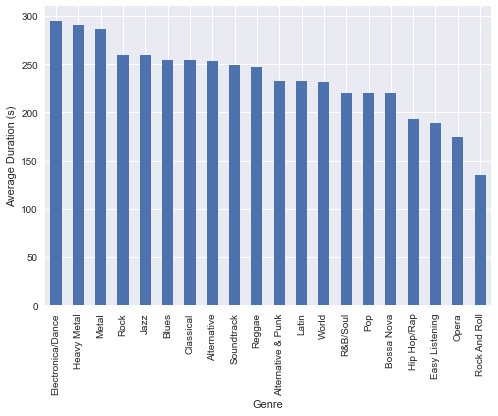

In [75]:
ax = avg_duration_by_genre.plot.bar(legend=False)
ax.set_xlabel('Genre')
ax.set_ylabel('Average Duration (s)')
plt.show()

## Salvando os dados em disco

In [76]:
only_music_clean.to_csv('data/only_music_clean.csv', index=False)